# NOTES

* this notebook has unbalanced data
* null values were dropped- performed better than dataset with imputed values


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sqlalchemy import create_engine
import pickle 


from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix

from sklearn.metrics import accuracy_score

from sklearn.metrics import roc_auc_score

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier


/Users/ellenkim/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/ellenkim/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
with open('drop_wt_trans.pkl', 'r') as picklefile:
    df5 = pickle.load(picklefile)

In [3]:
df5.head()

,IsBadBuy,VehOdo,MMRCurrentRetailAveragePrice,WarrantyCost,ADESA,MANHEIM,OTHER,1,10,11,...,OK,OR,PA,SC,TN,TX,UT,VA,WA,WV
0,0,0.758303,0.296750,0.092524,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.799509,0.291044,0.083997,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.620205,0.182856,0.131751,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.545986,0.111950,0.023877,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.579969,0.172441,0.079306,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Create Train/Test Split


In [4]:
X = df5.drop(['IsBadBuy'], 1)
y= df5["IsBadBuy"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
sample= df5.ix[13298,:]

In [28]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [29]:
dt_predictions = dtree.predict(sample)


/Users/ellenkim/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: Number of features of the model must match the input. Model n_features is 354 and input n_features is 355 

In [24]:
dt_predictions

array([0])

# Model 1: DECISION TREE 

In [23]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
dt_predictions = dtree.predict(X_test)
dt_proba = dtree.predict_proba(X_test)

### Decision Tree Classification Report

In [24]:

print(classification_report(y_test,dt_predictions))

             precision    recall  f1-score   support

          0       0.91      0.90      0.91     18856
          1       0.14      0.15      0.14      1993

avg / total       0.84      0.83      0.83     20849



### Decision Tree Confusion Matrix


In [25]:
print(confusion_matrix(y_test,dt_predictions))

[[17039  1817]
 [ 1704   289]]


### Gridsearch

In [8]:
from sklearn.grid_search import GridSearchCV

dt_PARAMETERS = {"max_depth":[1,2,3,4,5,7,9,10,15,20,30], "max_features": [1,10,30,100,200,300]}
dt_SCORING = "accuracy"
dt_model = DecisionTreeClassifier()
grid = GridSearchCV(dt_model, param_grid=dt_PARAMETERS, scoring=dt_SCORING)
grid.fit(X_train, y_train)


#look at max features

print grid.best_estimator_
print grid.best_score_


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=200, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
0.87615021628


### Fine-tuned Decision Tree

In [20]:
dtree = DecisionTreeClassifier(max_depth=3)
dtree.fit(X_train,y_train)
dt_predictions = dtree.predict(X_test)
dt_proba = dtree.predict_proba(X_test)

### Changing Thresholds

In [26]:
dt_y_pp = pd.DataFrame(dtree.predict_proba(X_test), columns=['Not_Lemon','Lemon'])

dt_y_pp['thresh50'] = dt_predictions
dt_y_pp['thresh10'] = [1 if x >= 0.1 else 0 for x in dt_y_pp.Lemon.values]
dt_y_pp['thresh08'] = [1 if x >= 0.08 else 0 for x in dt_y_pp.Lemon.values]
print(dt_y_pp.iloc[0:10])

   Not_Lemon  Lemon  thresh50  thresh10  thresh08
0        1.0    0.0         0         0         0
1        1.0    0.0         0         0         0
2        1.0    0.0         0         0         0
3        1.0    0.0         0         0         0
4        1.0    0.0         0         0         0
5        1.0    0.0         0         0         0
6        1.0    0.0         0         0         0
7        1.0    0.0         0         0         0
8        1.0    0.0         0         0         0
9        1.0    0.0         0         0         0


### 50% Threshold (default)

In [27]:
print "Classification Report - 50% Threshold""\n"
print(classification_report(y_test,dt_predictions))

dt_conmat_50 = np.array(confusion_matrix(y_test, dt_y_pp.thresh50.values, labels=[1,0]))
dt_confusion_50 = pd.DataFrame(dt_conmat_50, index=['Lemon', 'Not_Lemon'],columns=['pred_lemon','pred_not_lemon'])


print "\n" "\n" "\n" "Confusion Matrix for 50% threshold" 
print str(dt_confusion_50), "\n" "\n"

Classification Report - 50% Threshold

             precision    recall  f1-score   support

          0       0.91      0.90      0.91     18856
          1       0.14      0.15      0.14      1993

avg / total       0.84      0.83      0.83     20849




Confusion Matrix for 50% threshold
           pred_lemon  pred_not_lemon
Lemon             289            1704
Not_Lemon        1817           17039 




### 10% Threshold

In [12]:
print "Classication Report 10% Threshold"
dt_pred10 = dt_y_pp['thresh10']
print(classification_report(y_test,dt_pred10))

dt_conmat_10 = np.array(confusion_matrix(y_test, dt_y_pp.thresh10.values, labels=[1,0]))
dt_confusion_10 = pd.DataFrame(dt_conmat_10, index=['Lemon', 'Not_Lemon'],columns=['pred_lemon','pred_not_lemon'])

print "\n" "\n" "Confusion Matrix for 10% threshold" "\n"
print str(dt_confusion_10), "\n" "\n"


Classication Report 10% Threshold
             precision    recall  f1-score   support

          0       0.93      0.58      0.71     18856
          1       0.13      0.60      0.21      1993

avg / total       0.86      0.58      0.66     20849



Confusion Matrix for 10% threshold

           pred_lemon  pred_not_lemon
Lemon            1200             793
Not_Lemon        8004           10852 




### 8% Threshold

In [13]:
print "Classication Report 8% Threshold" 
dt_pred08 = dt_y_pp['thresh08']
print(classification_report(y_test,dt_pred08))


dt_conmat_08 = np.array(confusion_matrix(y_test, dt_y_pp.thresh08.values, labels=[1,0]))
dt_confusion_08 = pd.DataFrame(dt_conmat_08, index=['Lemon', 'Not_Lemon'],columns=['pred_lemon','pred_not_lemon'])
print "\n" "\n" "Confusion Matrix for 8% threshold" "\n"
print str(dt_confusion_08), "\n" "\n"



Classication Report 8% Threshold
             precision    recall  f1-score   support

          0       0.93      0.58      0.71     18856
          1       0.13      0.60      0.21      1993

avg / total       0.86      0.58      0.66     20849



Confusion Matrix for 8% threshold

           pred_lemon  pred_not_lemon
Lemon            1200             793
Not_Lemon        8004           10852 




# Model 2:  RANDOM FOREST 

In [14]:

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [15]:
rf_predictions = rfc.predict(X_test)
rf_proba = rfc.predict_proba(X_test)
print(classification_report(y_test,rf_predictions))

             precision    recall  f1-score   support

          0       0.91      1.00      0.95     18856
          1       0.33      0.02      0.04      1993

avg / total       0.85      0.90      0.86     20849



### Fine Tuning Model 2: Random Forest

In [16]:
from sklearn.grid_search import GridSearchCV

rf_PARAMETERS = {"max_depth":[1,2,3,4,5,7,9,10,15,20,30], "n_estimators": [10,20,50,100,200]}
rf_SCORING = "accuracy"
rf_model = RandomForestClassifier()
grid = GridSearchCV(rf_model, param_grid=rf_PARAMETERS, scoring=rf_SCORING)
grid.fit(X_train, y_train)

#look at max features

print grid.best_estimator_
print grid.best_score_


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=30, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
0.876405819898


In [16]:

rfc = RandomForestClassifier(max_depth=30, n_estimators=50)
rfc.fit(X_train, y_train)



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=30, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [17]:
rf_predictions = rfc.predict(X_test)
rf_proba = rfc.predict_proba(X_test)
print(classification_report(y_test,rf_predictions))

             precision    recall  f1-score   support

          0       0.90      1.00      0.95     18856
          1       0.50      0.00      0.01      1993

avg / total       0.87      0.90      0.86     20849



### Threshold - 50%, 10%, 8%

In [18]:
rf_Y_pp = pd.DataFrame(rfc.predict_proba(X_test), columns=['Not_Lemon','Lemon'])
rf_Y_pp['thresh50'] = rf_predictions
rf_Y_pp['thresh10'] = [1 if x >= 0.1 else 0 for x in rf_Y_pp.Lemon.values]
rf_Y_pp['thresh08'] = [1 if x >= 0.08 else 0 for x in rf_Y_pp.Lemon.values]
print(rf_Y_pp.iloc[0:10])

   Not_Lemon     Lemon  thresh50  thresh10  thresh08
0   0.919955  0.080045         0         0         1
1   0.974154  0.025846         0         0         0
2   0.928525  0.071475         0         0         0
3   0.939960  0.060040         0         0         0
4   0.805674  0.194326         0         1         1
5   0.942848  0.057152         0         0         0
6   0.922058  0.077942         0         0         0
7   0.862430  0.137570         0         1         1
8   0.932684  0.067316         0         0         0
9   0.956405  0.043595         0         0         0


### 50% Threshold

In [19]:
rf_pred50 = rf_Y_pp['thresh50']
rf_pred10 = rf_Y_pp['thresh10']
rf_pred08 = rf_Y_pp['thresh08']

rf_acc_50 = accuracy_score(y_test, rf_Y_pp["thresh50"])
rf_acc_10 = accuracy_score(y_test, rf_Y_pp["thresh10"])
rf_acc_08 =accuracy_score(y_test, rf_Y_pp["thresh08"])

rf_conmat_50 = np.array(confusion_matrix(y_test, rf_Y_pp.thresh50.values, labels=[1,0]))
rf_confusion_50 = pd.DataFrame(rf_conmat_50, index=['Lemon', 'Not_Lemon'],columns=['pred_lemon','pred_not_lemon'])

print "Confusion Matrix for 50% threshold" "\n"
print str(rf_confusion_50), "\n" "\n"
print "50% (default) THRESHOLD"
print(classification_report(y_test,rf_pred50))
print "The accuracy score for threshold of 50% =", str(rf_acc_50)

Confusion Matrix for 50% threshold

           pred_lemon  pred_not_lemon
Lemon               8            1985
Not_Lemon           8           18848 


50% (default) THRESHOLD
             precision    recall  f1-score   support

          0       0.90      1.00      0.95     18856
          1       0.50      0.00      0.01      1993

avg / total       0.87      0.90      0.86     20849

The accuracy score for threshold of 50% = 0.90440788527


### 10% Threshold

In [20]:
rf_conmat_10 = np.array(confusion_matrix(y_test, rf_Y_pp.thresh10.values, labels=[1,0]))
rf_confusion_10 = pd.DataFrame(rf_conmat_10, index=['Lemon', 'Not_Lemon'],columns=['pred_lemon','pred_not_lemon'])
print "Confusion Matrix for 10% threshold" "\n"
print str(rf_confusion_10), "\n" "\n"

print "10% THRESHOLD"
print(classification_report(y_test,rf_pred10))

print "The accuracy score for threshold of 10% =", str(rf_acc_10)

Confusion Matrix for 10% threshold

           pred_lemon  pred_not_lemon
Lemon            1194             799
Not_Lemon        6466           12390 


10% THRESHOLD
             precision    recall  f1-score   support

          0       0.94      0.66      0.77     18856
          1       0.16      0.60      0.25      1993

avg / total       0.86      0.65      0.72     20849

The accuracy score for threshold of 10% = 0.651542040386


### 8% Threshold

In [21]:
rf_conmat_08 = np.array(confusion_matrix(y_test, rf_Y_pp.thresh08.values, labels=[1,0]))
rf_confusion_08 = pd.DataFrame(rf_conmat_08, index=['Lemon', 'Not_Lemon'],columns=['pred_lemon','pred_not_lemon'])

print "Confusion Matrix for 8% threshold" "\n"
print str(rf_confusion_08), "\n" "\n"

print "8% THRESHOLD"
print(classification_report(y_test,rf_pred08))

print "The accuracy score for threshold of 8% =", str(rf_acc_08)

Confusion Matrix for 8% threshold

           pred_lemon  pred_not_lemon
Lemon            1447             546
Not_Lemon        9038            9818 


8% THRESHOLD
             precision    recall  f1-score   support

          0       0.95      0.52      0.67     18856
          1       0.14      0.73      0.23      1993

avg / total       0.87      0.54      0.63     20849

The accuracy score for threshold of 8% = 0.54031368411


### Cross Val

In [22]:
# read default behavior
rfc = RandomForestClassifier()
print(cross_val_score(rfc, X, y))  

[ 0.90114397  0.90062594  0.90135555]


# Model 3: Logistic Regression

In [18]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# coefficients:
logreg.coef_

# predict class:
lr_y_pred = logreg.predict(X_test)

# predicted probability:
lr_y_pp = pd.DataFrame(logreg.predict_proba(X_test), columns=["Not_Lemons","Lemons"])
#output is probabiliyt for every y_pred. what 

lr_y_pp['thresh50'] = lr_y_pred
lr_y_pp.head()

y_score = lr_y_pp["Lemons"]

In [19]:
print(classification_report(y_test,lr_y_pred))

             precision    recall  f1-score   support

          0       0.90      1.00      0.95     18856
          1       0.22      0.00      0.00      1993

avg / total       0.84      0.90      0.86     20849



### AUC

In [20]:
auc = roc_auc_score(y_test, y_score)
auc


0.69415541369762346

### GridSearch

In [26]:
dt_PARAMETERS = {"penalty":["l1","l2"], "C":[0.1,.5,1,] }
dt_SCORING = 'precision'
dt_model = LogisticRegression()
grid = GridSearchCV(dt_model, param_grid=dt_PARAMETERS, scoring=dt_SCORING)
grid.fit(X_train, y_train)


#look at max features

print grid.best_estimator_
print grid.best_score_


/Users/ellenkim/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
0.384256975137


### Fine Tuning Model 3: Logistic Regression

In [6]:
logreg = LogisticRegression(C=1, penalty="l1")
logreg.fit(X_train, y_train)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [6]:
import pickle
with open('logistic_reg.pkl', 'w') as picklefile:
    pickle.dump(logreg, picklefile)

In [7]:

# coefficients:
logreg.coef_

# predict class:
lr_y_pred = logreg.predict(X_test)

# predicted probability:
lr_y_pp = pd.DataFrame(logreg.predict_proba(X_test), columns=["Not_Lemons","Lemons"])
#output is probabiliyt for every y_pred. what 

lr_y_pp['thresh50'] = lr_y_pred
lr_y_pp.head()

,Not_Lemons,Lemons,thresh50
0,0.926557,0.073443,0
1,0.988686,0.011314,0
2,0.983662,0.016338,0
3,0.922047,0.077953,0
4,0.782954,0.217046,0


In [8]:
copy_y_test = y_test


In [8]:
copy_y_test = copy_y_test.reset_index()


In [10]:
copy_y_test = copy_y_test.drop("index", 1)

In [11]:
lr_y_pp['y_test'] = copy_y_test

In [9]:
lr_y_pp

,Not_Lemons,Lemons,thresh50
0,0.926557,0.073443,0
1,0.988686,0.011314,0
2,0.983662,0.016338,0
3,0.922047,0.077953,0
4,0.782954,0.217046,0
5,0.894894,0.105106,0
6,0.961769,0.038231,0
7,0.836058,0.163942,0
8,0.967147,0.032853,0
9,0.948773,0.051227,0


In [15]:
lemons = lr_y_pp[lr_y_pp["y_test"] == 1]


In [18]:
counter = lemons["Lemons"]

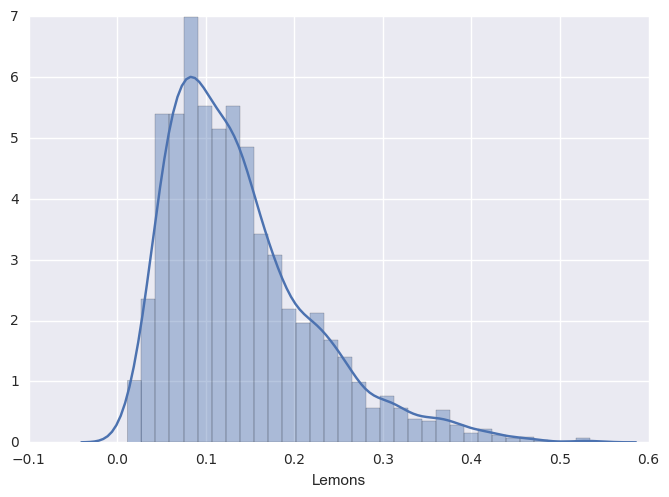

In [47]:
import seaborn as sns

ax = sns.distplot(counter)

In [6]:
with open('lemon_logreg2.pkl', 'w') as picklefile:
    pickle.dump(logreg, picklefile)

In [10]:
print(classification_report(y_test,lr_y_pred))

             precision    recall  f1-score   support

          0       0.90      1.00      0.95     18856
          1       0.25      0.00      0.00      1993

avg / total       0.84      0.90      0.86     20849



### Threshold - 50%, 10%, 8%

In [11]:
lr_y_pp['thresh10'] = [1 if x >= 0.1 else 0 for x in lr_y_pp.Lemons.values]
lr_y_pp['thresh09'] = [1 if x >= 0.12 else 0 for x in lr_y_pp.Lemons.values]
lr_y_pp['thresh08'] = [1 if x >= 0.08 else 0 for x in lr_y_pp.Lemons.values]

lr_pred10 = lr_y_pp['thresh10']
lr_pred09 = lr_y_pp['thresh09']
lr_pred08 = lr_y_pp['thresh08']

print(lr_y_pp.iloc[0:10])

   Not_Lemons    Lemons  thresh50  thresh10  thresh09  thresh08
0    0.926557  0.073443         0         0         0         0
1    0.988686  0.011314         0         0         0         0
2    0.983662  0.016338         0         0         0         0
3    0.922047  0.077953         0         0         0         0
4    0.782954  0.217046         0         1         1         1
5    0.894894  0.105106         0         1         0         1
6    0.961769  0.038231         0         0         0         0
7    0.836058  0.163942         0         1         1         1
8    0.967147  0.032853         0         0         0         0
9    0.948773  0.051227         0         0         0         0


### 50% Threshold 

In [18]:
from sklearn.metrics import accuracy_score
acc_50 = accuracy_score(y_test, lr_y_pp['thresh09'])
acc_50

0.73917214254880326

In [13]:
lr_conmat_50 = np.array(confusion_matrix(y_test, lr_y_pp.thresh50.values, labels=[1,0]))
lr_confusion_50 = pd.DataFrame(lr_conmat_50, index=['Lemon', 'Not_Lemon'],columns=['pred_lemon','pred_not_lemon'])

print "Confusion Matrix for 50% threshold" "\n"
print str(lr_confusion_50), "\n" "\n"

print "50% THRESHOLD"
print(classification_report(y_test,lr_y_pred))

Confusion Matrix for 50% threshold

           pred_lemon  pred_not_lemon
Lemon               2            1991
Not_Lemon           6           18850 


50% THRESHOLD
             precision    recall  f1-score   support

          0       0.90      1.00      0.95     18856
          1       0.25      0.00      0.00      1993

avg / total       0.84      0.90      0.86     20849



### 10% Threshold 

In [14]:
from sklearn.metrics import accuracy_score
acc_10 = accuracy_score(y_test, lr_y_pp['thresh1'])
acc_10

0.65681807280924742

In [15]:
lr_conmat_10 = np.array(confusion_matrix(y_test, lr_y_pp.thresh10.values, labels=[1,0]))
lr_confusion_10 = pd.DataFrame(lr_conmat_10, index=['Lemon', 'Not_Lemon'],columns=['pred_lemon','pred_not_lemon'])

print "Confusion Matrix for 10% threshold" "\n"
print str(lr_confusion_10), "\n" "\n"

print "10% THRESHOLD"
print(classification_report(y_test,lr_pred10))

Confusion Matrix for 10% threshold

           pred_lemon  pred_not_lemon
Lemon            1224             769
Not_Lemon        6386           12470 


10% THRESHOLD
             precision    recall  f1-score   support

          0       0.94      0.66      0.78     18856
          1       0.16      0.61      0.25      1993

avg / total       0.87      0.66      0.73     20849



### 12% Threshold 

In [19]:
lr_conmat_09 = np.array(confusion_matrix(y_test, lr_y_pp.thresh09.values, labels=[1,0]))
lr_confusion_09 = pd.DataFrame(lr_conmat_09, index=['Lemon', 'Not_Lemon'],columns=['pred_lemon','pred_not_lemon'])

print "Confusion Matrix for 12% threshold" "\n"
print str(lr_confusion_09), "\n" "\n"

print "12% THRESHOLD"
print(classification_report(y_test,lr_pred09))

Confusion Matrix for 12% threshold

           pred_lemon  pred_not_lemon
Lemon            1016             977
Not_Lemon        4461           14395 


12% THRESHOLD
             precision    recall  f1-score   support

          0       0.94      0.76      0.84     18856
          1       0.19      0.51      0.27      1993

avg / total       0.86      0.74      0.79     20849



In [32]:
total =  1016 + 977 + 4461 + 14395
correct = 1016 + 14395
acc = float(correct) / total
acc


0.7391721425488033

### 8% Threshold 

In [17]:
lr_conmat_08 = np.array(confusion_matrix(y_test, lr_y_pp.thresh08.values, labels=[1,0]))
lr_confusion_08 = pd.DataFrame(lr_conmat_08, index=['Lemon', 'Not_Lemon'],columns=['pred_lemon','pred_not_lemon'])

print "Confusion Matrix for 8% threshold" "\n"
print str(lr_confusion_09), "\n" "\n"

print "8% THRESHOLD"
print(classification_report(y_test,lr_pred08))

Confusion Matrix for 8% threshold

           pred_lemon  pred_not_lemon
Lemon            1016             977
Not_Lemon        4461           14395 


8% THRESHOLD
             precision    recall  f1-score   support

          0       0.95      0.52      0.67     18856
          1       0.14      0.74      0.24      1993

avg / total       0.87      0.54      0.63     20849



# Model 4: ADA Boosting

In [37]:
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
ada_predictions = ada.predict(X_test)

# predicted probability:
ada_y_pp = pd.DataFrame(ada.predict_proba(X_test), columns=["Not_Lemons","Lemons"])

ada_y_pp['thresh50'] = ada_predictions




In [38]:
ada_y_pp['thresh45'] = [1 if x >= 0.45 else 0 for x in ada_y_pp.Lemons.values]
ada_y_pp['thresh40'] = [1 if x >= 0.4 else 0 for x in ada_y_pp.Lemons.values]

print(ada_y_pp.iloc[0:10])

ada_pred45 = ada_y_pp['thresh45']
ada_pred40 = ada_y_pp['thresh40']

   Not_Lemons    Lemons  thresh50  thresh45  thresh40
0    0.512122  0.487878         0         1         1
1    0.524159  0.475841         0         1         1
2    0.518706  0.481294         0         1         1
3    0.513232  0.486768         0         1         1
4    0.507843  0.492157         0         1         1
5    0.508453  0.491547         0         1         1
6    0.515313  0.484687         0         1         1
7    0.507047  0.492953         0         1         1
8    0.517075  0.482925         0         1         1
9    0.513652  0.486348         0         1         1


In [39]:
print(classification_report(y_test,ada_predictions))
print(classification_report(y_test,ada_pred45))
print(classification_report(y_test,ada_pred40))

             precision    recall  f1-score   support

          0       0.90      1.00      0.95     18856
          1       0.50      0.00      0.00      1993

avg / total       0.87      0.90      0.86     20849

             precision    recall  f1-score   support

          0       0.92      0.00      0.00     18856
          1       0.10      1.00      0.17      1993

avg / total       0.84      0.10      0.02     20849

             precision    recall  f1-score   support

          0       0.92      0.00      0.00     18856
          1       0.10      1.00      0.17      1993

avg / total       0.84      0.10      0.02     20849



#### FINDINGS: ADA
* ada is not performing well.
* probabilites are closer together since the machine is learning from incorrectly labeled targets from previous iterations.

In [36]:
ada_PARAMETERS = {"base_estimator__max_depth":[1,2,3,4,5,7,9,10,15,20],"n_estimators":[30,50,70] }

DTC = DecisionTreeClassifier()
ada_SCORING = "precision"
ABC = AdaBoostClassifier(base_estimator = DTC)

grid = GridSearchCV(ABC, param_grid=ada_PARAMETERS, scoring=ada_SCORING)
grid.fit(X_train, y_train)


print grid.best_estimator_
print grid.best_score_


AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)
0.524606258168


In [37]:
ada = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth=1))
ada.fit(X_train, y_train)
ada_predictions = ada.predict(X_test)

# predicted probability:
ada_y_pp = pd.DataFrame(ada.predict_proba(X_test), columns=["Not_Lemons","Lemons"])

ada_y_pp['thresh50'] = ada_predictions




In [38]:
ada_y_pp['thresh45'] = [1 if x >= 0.45 else 0 for x in ada_y_pp.Lemons.values]
ada_y_pp['thresh40'] = [1 if x >= 0.4 else 0 for x in ada_y_pp.Lemons.values]

print(ada_y_pp.iloc[0:10])

ada_pred45 = ada_y_pp['thresh45']
ada_pred40 = ada_y_pp['thresh40']

   Not_Lemons    Lemons  thresh50  thresh45  thresh40
0    0.512535  0.487465         0         1         1
1    0.524415  0.475585         0         1         1
2    0.520084  0.479916         0         1         1
3    0.511712  0.488288         0         1         1
4    0.506790  0.493210         0         1         1
5    0.509438  0.490562         0         1         1
6    0.514876  0.485124         0         1         1
7    0.507741  0.492259         0         1         1
8    0.517538  0.482462         0         1         1
9    0.514057  0.485943         0         1         1


In [39]:
print(classification_report(y_test,ada_predictions))
print(classification_report(y_test,ada_pred45))
print(classification_report(y_test,ada_pred40))




             precision    recall  f1-score   support

          0       0.90      1.00      0.95     18856
          1       0.44      0.00      0.01      1993

avg / total       0.86      0.90      0.86     20849

             precision    recall  f1-score   support

          0       0.92      0.00      0.00     18856
          1       0.10      1.00      0.17      1993

avg / total       0.84      0.10      0.02     20849

             precision    recall  f1-score   support

          0       0.92      0.00      0.00     18856
          1       0.10      1.00      0.17      1993

avg / total       0.84      0.10      0.02     20849



0.90412010168353396

# Model 5 : Gradient Boosting

In [31]:
from sklearn.ensemble import GradientBoostingClassifier


In [32]:
gb = GradientBoostingClassifier(learning_rate=0.3)
gb.fit(X_train, y_train)






GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.3, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [33]:
gb_predictions = gb.predict(X_test)
# predicted probability:
gb_y_pp = pd.DataFrame(gb.predict_proba(X_test), columns=["Not_Lemons","Lemons"])


In [34]:
gb_y_pp['thresh50'] = gb_predictions


In [35]:
gb_y_pp['thresh10'] = [1 if x >= 0.1 else 0 for x in gb_y_pp.Lemons.values]
gb_y_pp['thresh11'] = [1 if x >= 0.11 else 0 for x in gb_y_pp.Lemons.values]

print(gb_y_pp.iloc[0:10])

gb_pred10 = gb_y_pp['thresh10']
gb_pred08 = gb_y_pp['thresh11']

   Not_Lemons    Lemons  thresh50  thresh10  thresh11
0    0.920413  0.079587         0         0         0
1    0.985552  0.014448         0         0         0
2    0.893736  0.106264         0         1         0
3    0.886354  0.113646         0         1         1
4    0.882154  0.117846         0         1         1
5    0.892576  0.107424         0         1         0
6    0.922133  0.077867         0         0         0
7    0.817917  0.182083         0         1         1
8    0.954117  0.045883         0         0         0
9    0.954655  0.045345         0         0         0


In [36]:
print(classification_report(y_test,gb_predictions))
print(classification_report(y_test,gb_pred10))
print(classification_report(y_test,gb_pred08))

             precision    recall  f1-score   support

          0       0.91      1.00      0.95     18856
          1       0.23      0.01      0.02      1993

avg / total       0.84      0.90      0.86     20849

             precision    recall  f1-score   support

          0       0.94      0.70      0.80     18856
          1       0.17      0.59      0.26      1993

avg / total       0.87      0.69      0.75     20849

             precision    recall  f1-score   support

          0       0.94      0.75      0.83     18856
          1       0.18      0.52      0.27      1993

avg / total       0.86      0.73      0.78     20849



In [37]:
print(confusion_matrix(y_test,gb_pred08))

[[14095  4761]
 [  954  1039]]


In [38]:
auc = roc_auc_score(y_test, y_score)
auc

0.69415541369762346

In [39]:
auc

0.69415541369762346